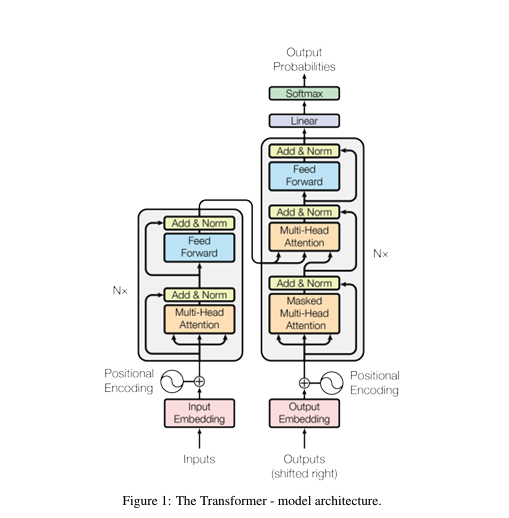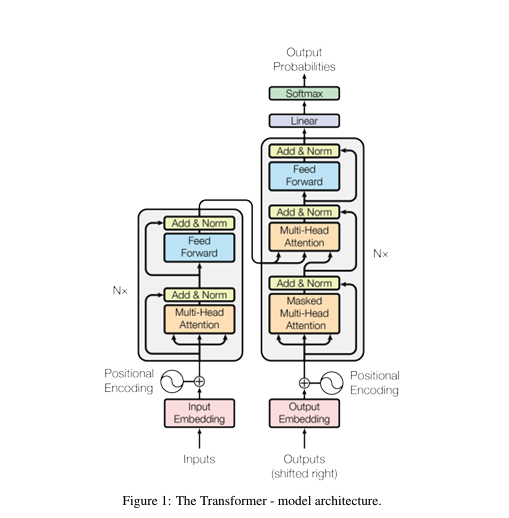

## WorkFlow

## 0. Import importnat libaries

In [2]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split
from torch.utils.tensorboard import SummaryWriter
# Math
import math
# HuggingFace Libraries
from datasets import load_dataset
from tokenizers import Tokenizer
from tokenizers.models import WordLevel
from tokenizers.trainers import WordLevelTrainer
from tokenizers.pre_tokenizers import Whitespace
# Pathlib
from pathlib import Path
# typing
from typing import Any
# Library for progress bars in loops
from tqdm import tqdm
# Importing library of warnings
import warnings

## 1.Input Embedding 

In [ ]:
class InputEmbeddings(nn.Module):
    def __init__(self,d_model:int,vocab_size:int):
        super().__init__()
        self.d_model=d_model
        self.vocab_size=vocab_size
        self.embedding=nn.Embedding(vocab_size,d_model)

    def forward(self,x):
        return self.embedding(x)*math.sqrt(self.d_model)  

In [ ]:
d_model=512 
vocab_size=10

## 2.Positional Encoding

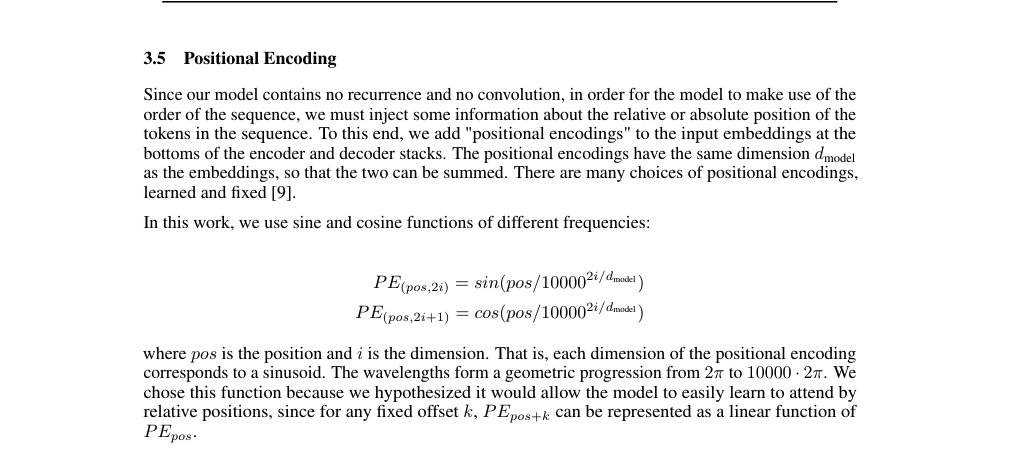

In [5]:
class PositionalEncoding(nn.Module):
    def __init__(self,d_model:int,seq_len:int,drop_out:float):
        super().__init__()
        self.d_model=d_model
        self.seq_len=seq_len
        self.dropout=nn.Dropout(dropout)

        pe=torch.zeros(seq_len,d_model)
        position=torch.arange(0,seq_len,dtype=torch.float).unsqueez(1)
        div_term=torch.exp(torch.arnage(0,d_model,2).float()*(-math.log(10000.0)/d_model))
        pe[:,0,::2]=torch.sin(position*div_term)
        pe[:,1::2]=torch.cos(position*div_term)
        pe=pe.unsqueeze(0)
        self.regsiter_buffer('pe',pe)


    def forward(self,x):
        x=x+(Self.pe[:,:x.shape[1],:]).require_grad_(False)
        return self.dropout(x)
        
        

## 3.Multihead Attention